### **Student Information**
Name: Mara Guillen

Student ID: M11315812

GitHub ID: Magui4321

Kaggle name: Mara Guillén

Kaggle private scoreboard snapshot: 



In [1]:
!wget -O my_image.jpg "https://drive.google.com/uc?export=download&id=1ZcN6m3fO5iwg7fo44EwqYu0NVsuSk2kB"


--2025-11-25 15:24:37--  https://drive.google.com/uc?export=download&id=1ZcN6m3fO5iwg7fo44EwqYu0NVsuSk2kB
Resolving drive.google.com (drive.google.com)... 192.178.129.101, 192.178.129.139, 192.178.129.102, ...
Connecting to drive.google.com (drive.google.com)|192.178.129.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZcN6m3fO5iwg7fo44EwqYu0NVsuSk2kB&export=download [following]
--2025-11-25 15:24:37--  https://drive.usercontent.google.com/download?id=1ZcN6m3fO5iwg7fo44EwqYu0NVsuSk2kB&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.195.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36277 (35K) [image/png]
Saving to: ‘my_image.jpg’

my_image.jpg        100%[===================>]  35.43K  --.-KB/s    in 0s     

(-0.5, 1499.5, 225.5, -0.5)

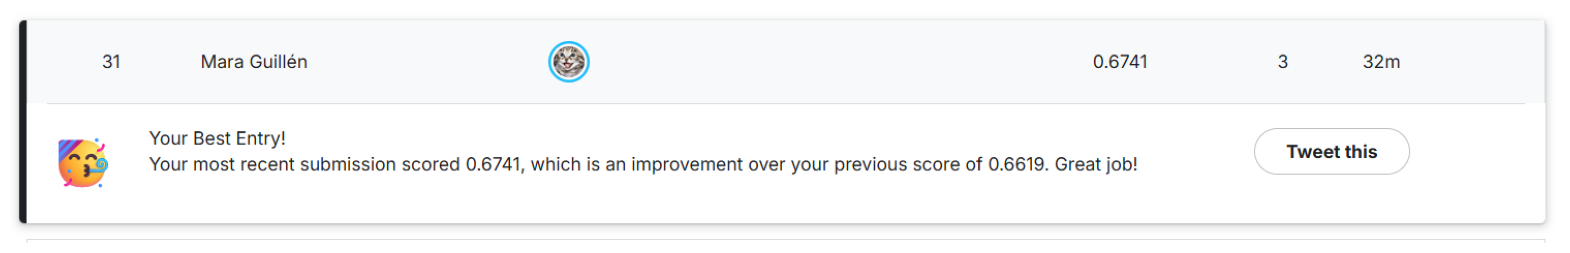

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("my_image.jpg")

plt.figure(figsize=(20, 20))   
plt.imshow(img)
plt.axis('off')


just download the image

***

# **Project Report**


---

## 1. Model Development (10 pts Required)
---


---
### 1.1 Preprocessing Steps
**What I did in the code for the preprocessing steps:**
*   *Dataset merging and reconstruction:* `*The first step was to rebuild the dataset**`
    * Extracted post ID and text from the JSON structure
    * Normalized JSON fields using pd.json_normalize
    * Split the final dataset into train and test based on the split column
*   *Text cleaning pipeline:* `*To improve feature quality**`
    * Basic cleaning: removing emojis, URLs, hashtags. Filtering out unusual characters and symbols
    * Advanced cleaning: applied NLTK stopword removal, performed lemmatization, removed filler words
*   *Emotion distribution analysis:* `* visual distribution of the emotion classes**`
    * joy, anger appear more frequently than fear and love that are clearly minority
___

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import dotenv
from google import genai
import gensim
import tensorflow
import tensorflow_hub
import keras
from bs4 import BeautifulSoup
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import scipy
%matplotlib inline
print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

ImportError: cannot import name 'genai' from 'google' (unknown location)

In [ ]:
pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 76.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
import torch
import pandas as pd
import json
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
df_id = pd.read_csv("/kaggle/input/dm-lab-2-private-competition/data_identification.csv")
df_emotion = pd.read_csv("/kaggle/input/dm-lab-2-private-competition/emotion.csv")

print("df_id", list(df_id.columns))
print("df_emotion", list(df_emotion.columns))

df_id ['id', 'split']
df_emotion ['id', 'emotion']


In [ ]:
df_id

,id,split
0,0x61fc95,test
1,0x35663e,train
2,0xc78afe,train
3,0x90089c,train
4,0xaba820,test
...,...,...
64166,0x4afbe1,train
64167,0xf5ba78,train
64168,0x8f758e,test
64169,0xb5a35a,train


In [ ]:
df_emotion

,id,emotion
0,0x35663e,joy
1,0xc78afe,fear
2,0x90089c,joy
3,0x2ffb63,joy
4,0x989146,joy
...,...,...
47885,0xd740f2,joy
47886,0x99267e,anger
47887,0x4afbe1,anger
47888,0xf5ba78,joy


In [ ]:
with open("/kaggle/input/dm-lab-2-private-competition/final_posts.json", "r", encoding="utf-8") as f:
    posts = json.load(f)

df_posts = pd.json_normalize(posts, sep="_")

print("posts columns:\n")
for c in df_posts.columns:
    print(c)

posts columns:

root__type
root__source_post_post_id
root__source_post_text
root__source_post_hashtags


In [ ]:
# Better json file reading
df_posts = pd.json_normalize(posts, sep="_")

# Extract id and text
df_posts = df_posts.rename(columns={
    "root__source_post_post_id": "id",
    "root__source_post_text": "text"
})[["id", "text"]]

# Clean columns
df_id.columns = df_id.columns.str.strip().str.lower()
df_emotion.columns = df_emotion.columns.str.strip().str.lower()
df_posts.columns = df_posts.columns.str.strip().str.lower()

# Merge
df = pd.merge(df_id, df_posts, on="id", how="left")
df = pd.merge(df, df_emotion, on="id", how="left")

# Split into train and test
train_df = df[df["split"] == "train"].dropna(subset=["emotion"])
test_df = df[df["split"] == "test"]

# Save
train_df.to_csv("train_ready.csv", index=False)
test_df.to_csv("test_ready.csv", index=False)

print("Train:\n",train_df.head(5))
print("Test:\n",test_df.head(5))


Train:
          id  split                                               text emotion
1  0x35663e  train  I bet there is an army of married couples who ...     joy
2  0xc78afe  train                         This could only end badly.    fear
3  0x90089c  train  My sister squeezed a lime in her milk when she...     joy
7  0x2ffb63  train                                Thank you so much❤️     joy
9  0x989146  train  Stinks because ive been in this program for a ...     joy
Test:
          id split                                               text emotion
0  0x61fc95  test  We got the ranch, loaded our guns and sat up t...     NaN
4  0xaba820  test         and that got my head bobbing a little bit.     NaN
5  0x66e44d  test                Same. Glad it's not just out store.     NaN
6  0xc03cf5  test  Like always i will wait and see thanks for the...     NaN
8  0x02f65a  test  There's a bit of room between "not loving sub-...     NaN


In [ ]:
import re
import pandas as pd
import emoji
# read the new data
train_df = pd.read_csv("train_ready.csv")
test_df  = pd.read_csv("test_ready.csv")

# Cleaning the emojis, and replacing/delete everything that isn't a word (/?{}, etc.)
def clean_text(t: str) -> str:
    t = str(t).lower()
    t = emoji.replace_emoji(t, replace='')           
    t = re.sub(r"http\S+|www\S+", " ", t)           
    t = re.sub(r"@\w+", " ", t)                    
    t = re.sub(r"#(\w+)", r"\1", t)                 
    t = re.sub(r"[^a-z0-9'!?.,\s]", " ", t)         
    t = re.sub(r"\s+", " ", t).strip()
    return t


# Apply to the new "clean data" clean text
train_df["clean_text"] = train_df["text"].apply(clean_text)
test_df["clean_text"]  = test_df["text"].apply(clean_text)

train_df.head(5)

,id,split,text,emotion,clean_text
0,0x35663e,train,I bet there is an army of married couples who ...,joy,i bet there is an army of married couples who ...
1,0xc78afe,train,This could only end badly.,fear,this could only end badly.
2,0x90089c,train,My sister squeezed a lime in her milk when she...,joy,my sister squeezed a lime in her milk when she...
3,0x2ffb63,train,Thank you so much❤️,joy,thank you so much
4,0x989146,train,Stinks because ive been in this program for a ...,joy,stinks because ive been in this program for a ...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def advanced_clean(text):
    text = clean_text(text)
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

train_df["clean_text"] = train_df["text"].apply(advanced_clean)
test_df["clean_text"]  = test_df["text"].apply(advanced_clean)

In [ ]:
train_df.to_csv("train_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)
test_df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,split,text,emotion,clean_text
0,0x61fc95,test,"We got the ranch, loaded our guns and sat up t...",NaN,"got ranch, loaded gun sat till sunrise."
1,0xaba820,test,and that got my head bobbing a little bit.,NaN,got head bobbing little bit.
2,0x66e44d,test,Same. Glad it's not just out store.,NaN,same. glad store.
3,0xc03cf5,test,Like always i will wait and see thanks for the...,NaN,like always wait see thanks post tho name
4,0x02f65a,test,"There's a bit of room between ""not loving sub-...",NaN,there's bit room loving sub zero temperature n...


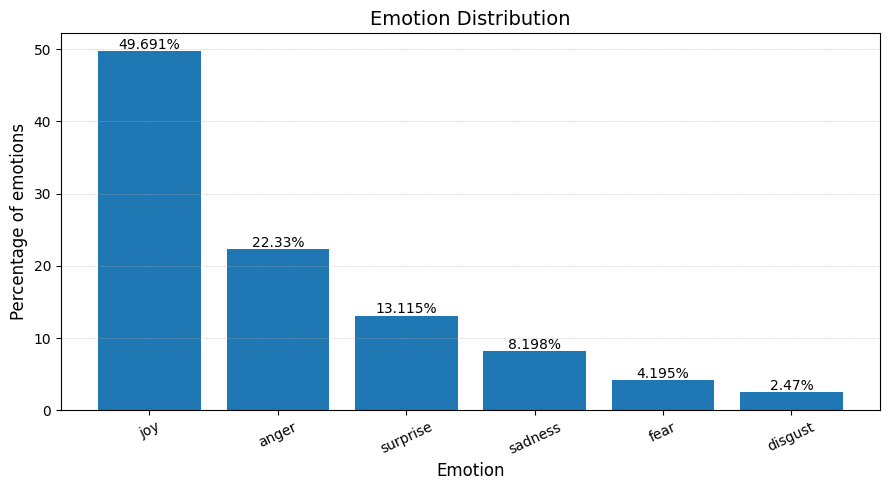

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate distribution
post_total = len(train_df)
df1 = (
    train_df.groupby('emotion')
            .count()['text']
            .apply(lambda x: round(x * 100 / post_total, 3))
)

# Sorted by percentage
df1 = df1.sort_values(ascending=False)

plt.figure(figsize=(9, 5))
bars = plt.bar(df1.index, df1.values)

# Labels
plt.ylabel('Percentage of emotions', fontsize=12)
plt.xlabel('Emotion', fontsize=12)
plt.title('Emotion Distribution', fontsize=14)

# Light grid
plt.grid(True, linestyle='--', linewidth=0.4, axis='y', alpha=0.7)

# Rotate ticks
plt.xticks(rotation=25, fontsize=10)

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.3,
        f"{height}%",
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


---
### 1.2 Feature Engineering Steps
**What I did in the code for the Feature Engineering steps:**
*   *Bag-of-Words:* *Full Vocabulary that captured all unique tokens*
    * Produced a very sparse high-dimensional matrix
    * Attempting to convert to dense .toarray() leads to MemoryError in my jupyter notebook, so I just doing it in here
*   *TF-IDF with feature cap:* *Feature names inspected manually to ensure meaningful vocabulary (1000)*
    * Tokenized with NLTK
    * Removed English stopwords
    * More efficient representation
*   *Reduced BOW Representation:* *500 features to make it shorter the training*
    * A compact feature space
    * Reduces noise and increases model training speed
    * Used for classical ML models such as Decision Tree, NB, and SVM
___

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [ ]:
# BOW
BOW_vectorizer = CountVectorizer() 

# Learn from the tokens
BOW_vectorizer.fit(train_df['text'])

# 2. Transform to term matrix train and text
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In my jupyter notebook I have to put BOW_vectorizer = CountVectorizer(max_features=9000)
Because there was a problem with my array memory

In [ ]:
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the shape
print("Kaggle shape:\n", train_data_BOW_features.shape)
print("Comparing with my jupyter notebook:\n (47890, 9000)")

Kaggle shape:
 (47890, 33893)
Comparing with my jupyter notebook:
 (47890, 9000)


In [ ]:
#TF-IDF
TFIDF_1000 = TfidfVectorizer(
    max_features=1000, tokenizer=nltk.word_tokenize, lowercase=True, stop_words='english'            
)

# Tokenize text
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features = TFIDF_1000.transform(train_df['text'])

# names
f_n_1000 = TFIDF_1000.get_feature_names_out()
print(f_n_1000[500:505])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['lies' 'life' 'light' 'like' 'liked']


In [ ]:
# Building a small set
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

train_data_BOW_features_500.shape

(47890, 500)

In [ ]:
f_n_500 = BOW_500.get_feature_names_out()
f_n_500[400:410]

array(['thanks', 'that', 'thats', 'the', 'their', 'them', 'then', 'there',
       'these', 'they'], dtype=object)

**Insights from 1.1 and 1.2:**
1. JSON normalization was essential: This merging step ensures consistent alignment on the data
2. Text cleaning dramatically affects classical models
3. High-dimensional sparse matrices cause memory issues
*  *Limiting features (500 or 1000) is a practical and effective solution*
4. The dataset is imbalanced
*  *baseline models will naturally prefer majority classes*
*  *future experiments (SVM or BERT) should use class weighting*
  
5. Reduced BOW models are efficient for experimentation


---
### 1.3 Explanation of Your Model
**What I did in the code for the Model:**
*   *Naive Bayes Baseline* *I first trained a simple baseline using Multinomial Naive Bayes on the reduced Bag-of-Words*
    * Train accuracy: ~0.58, Validation accuracy: ~0.57, Minority classes receiving very low F1
    * NB learns strong priors from the training split (high train accuracy). But it struggles on validation data, with high bias + vocabulary mismatch
*   *DistilBERT: Manual Training Loop* *training pipeline using DistilBERT-base-uncased*
    * Class weights (to address emotion imbalance)
    * Label smoothing
    * R-Drop consistency regularization
    * Optional Mixout regularization
    * Linear scheduler with warmup
    * Early stopping

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
# Train and test
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']


X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.2,        
    random_state=42, 
    stratify=y_train      
)

print("X_train_sub:", X_train_sub.shape)
print("y_train_sub:", y_train_sub.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

X_train_sub: (38312, 500)
y_train_sub: (38312,)
X_val: (9578, 500)
y_val: (9578,)


In [ ]:
#Naive Bayes
NB_model = MultinomialNB()
NB_model.fit(X_train_sub, y_train_sub)

y_pred_train = NB_model.predict(X_train_sub)
y_val_test = NB_model.predict(X_val)

acc_train = accuracy_score(y_train_sub, y_pred_train)
acc_val= accuracy_score(y_val, y_val_test)

print(f"Training accuracy: {acc_train:.2f}")
print(f"Testing accuracy : {acc_val:.2f}")
print("\nClassification:\n", classification_report(y_val, y_val_test))

Training accuracy: 0.58
Testing accuracy : 0.57

Classification:
               precision    recall  f1-score   support

       anger       0.48      0.42      0.45      2139
     disgust       0.08      0.03      0.04       237
        fear       0.25      0.27      0.26       402
         joy       0.66      0.79      0.72      4759
     sadness       0.41      0.17      0.25       785
    surprise       0.50      0.45      0.47      1256

    accuracy                           0.57      9578
   macro avg       0.40      0.36      0.36      9578
weighted avg       0.54      0.57      0.55      9578



In [ ]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 19.0.1
    Uninstalling pyarrow-19.0.1:
      Successfully uninstalled pyarrow-19.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
pylibcudf-cu12 25.2.2 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 22.0.0 which is incompatible.
cudf-cu12 25.2.2 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 22.0.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
cudf-polars-cu12 25.6.0 requires pylibcudf-cu12=

In [ ]:
pip uninstall -y pyarrow

Found existing installation: pyarrow 22.0.0
Uninstalling pyarrow-22.0.0:
  Successfully uninstalled pyarrow-22.0.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pyarrow==14.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 55.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 14.0.2 which is incompatible.
bigframes 2.12.0 requires pyarrow>=15.0.2, but you have pyarrow 14.0.2 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
cudf-polars-cu12 25.6.0 requires pylibcudf-cu12==25.6.*, but you have pylibcudf-cu12 25.2.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


*   *Data Preparation:* *Used raw text (not aggressively cleaned)*
    * Stratified 80/20 split to preserve class distribution
    * Computed balanced class weights because fear and love have fewer samples
*   *Tokenization & Sequence Length:* *192 was good.*
    * Earlier tests with less than 150 did not give me to much acc, more than 200 was to slow
*   *Loss Improvements:*
    * Weighted Label-Smoothed Cross Entropy
    * R-Drop Regularization (enabled), give consistency across two forward passes and reduces prediction variance
    * Mitigates overfitting when fine-tuning transformer weights directly
*   *Training Stability:* *prevents overfitting*
    * AdamW with proper weight decay separation
___

In [ ]:
# DistilBERT, manual training loop
import os, random, math
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup
)
import evaluate
from tqdm.auto import tqdm

SEED = 42

BATCH_SIZE = 16
NUM_EPOCHS = 5
LEARNING_RATE = 3e-5
WEIGHT_DECAY = 0.01
WARMUP_RATIO = 0.06
MAX_LEN = 192

USE_RDROP = True
RDROP_ALPHA = 0.5

USE_FOCAL = False
FOCAL_GAMMA = 2.0

USE_MIXOUT = False
MIXOUT_P = 0.1

EARLY_STOPPING_PATIENCE = 2


MODEL_NAME = "distilbert-base-uncased"


def set_seed(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device =", device)


# Load data

train_df = pd.read_csv("train_ready.csv")
test_df  = pd.read_csv("test_ready.csv")

train_df = train_df.dropna(subset=["text","emotion"]).reset_index(drop=True)
test_df = test_df.fillna({"text": ""}).reset_index(drop=True)

le = LabelEncoder().fit(train_df["emotion"])
train_df["label"] = le.transform(train_df["emotion"])

id2label = {i:c for i,c in enumerate(le.classes_)}
label2id = {c:i for i,c in enumerate(le.classes_)}
num_labels = len(le.classes_)

tr_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    random_state=SEED,
    stratify=train_df["label"]
)

class_weights_np = compute_class_weight(
    class_weight="balanced",
    classes=np.arange(num_labels),
    y=tr_df["label"]
)
class_weights = torch.tensor(class_weights_np, dtype=torch.float32, device=device)
print("Class weights:", class_weights_np)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

class EmotionDataset(Dataset):
    def __init__(self, df, is_train=True):
        self.texts = df["text"].tolist()
        self.is_train = is_train
        if is_train:
            self.labels = df["label"].tolist()
        else:
            self.labels = None

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=MAX_LEN,
            return_tensors="pt"
        )

        item = {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
        }

        if self.labels is not None:
            item["label"] = torch.tensor(self.labels[idx], dtype=torch.long)

        return item


train_dataset = EmotionDataset(tr_df, is_train=True)
val_dataset   = EmotionDataset(val_df, is_train=True)
test_dataset  = EmotionDataset(test_df, is_train=False)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



#Mixout

class MixLinear(nn.Linear):
    def __init__(self, in_features, out_features, bias=True, target_weight=None, p=0.0):
        super().__init__(in_features, out_features, bias=bias)
        self.p = p
        if target_weight is None:
            target_weight = self.weight.data.clone()
        self.register_buffer("target_weight", target_weight.clone())

    def forward(self, input):
        if self.training and self.p > 0:
            mask = torch.bernoulli((1 - self.p) * torch.ones_like(self.weight))
            weight = self.weight * mask + self.target_weight * (1 - mask)
        else:
            weight = self.weight
        return nn.functional.linear(input, weight, self.bias)


def apply_mixout_to_model(model, p):
    if p <= 0:
        return model

    for name, module in model.named_children():
        apply_mixout_to_model(module, p)
        if isinstance(module, nn.Linear):
            mix = MixLinear(
                module.in_features,
                module.out_features,
                bias=module.bias is not None,
                target_weight=module.weight.data.clone(),
                p=p
            )
            if module.bias is not None:
                mix.bias.data = module.bias.data.clone()
            setattr(model, name, mix)
    return model



#Model

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

if USE_MIXOUT:
    model = apply_mixout_to_model(model, MIXOUT_P)

model = model.to(device)


#Optimizer/Scheduler

no_decay = ["bias", "LayerNorm.weight"]

optimizer_grouped_parameters = [
    {
        "params":[p for n,p in model.named_parameters() if not any(nd in n for nd in no_decay)],
        "weight_decay": WEIGHT_DECAY
    },
    {
        "params":[p for n,p in model.named_parameters() if any(nd in n for nd in no_decay)],
        "weight_decay": 0.0
    }
]

optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=LEARNING_RATE)

num_training_steps = NUM_EPOCHS * len(train_loader)
num_warmup_steps = int(WARMUP_RATIO * num_training_steps)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=num_training_steps
)


#Metrics

metric_acc = evaluate.load("accuracy")
metric_f1 = evaluate.load("f1")

def eval_on_loader(model, loader):
    model.eval()
    all_preds, all_labels = [], []

    for batch in loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.argmax(dim=-1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    out = {}
    out.update(metric_acc.compute(predictions=all_preds, references=all_labels))
    out.update(metric_f1.compute(predictions=all_preds, references=all_labels, average="macro"))
    return out



#Loss functions

def compute_weighted_smoothed_ce(logits, labels):
    eps = 0.05
    log_probs = torch.nn.functional.log_softmax(logits, dim=-1)
    n_classes = log_probs.size(-1)

    with torch.no_grad():
        true_dist = torch.zeros_like(log_probs)
        true_dist.fill_(eps / (n_classes - 1))
        true_dist.scatter_(1, labels.unsqueeze(1), 1 - eps)

    weighted_log_probs = true_dist * log_probs * class_weights.unsqueeze(0)
    return -weighted_log_probs.sum(dim=1).mean()


def compute_focal_factor(logits, labels, gamma=2.0):
    probs = torch.softmax(logits, dim=-1)
    pt = probs.gather(1, labels.unsqueeze(1)).squeeze(1)
    return (1 - pt).clamp(min=1e-6) ** gamma


def compute_rdrop_kl(logits1, logits2):
    log_p1 = torch.nn.functional.log_softmax(logits1, dim=-1)
    log_p2 = torch.nn.functional.log_softmax(logits2, dim=-1)
    p1 = log_p1.exp()
    p2 = log_p2.exp()

    kl1 = torch.nn.functional.kl_div(log_p1, p2, reduction="batchmean")
    kl2 = torch.nn.functional.kl_div(log_p2, p1, reduction="batchmean")
    return 0.5 * (kl1 + kl2)



#Training Loop

best_f1 = -1.0
best_state = None
patience = 0

for epoch in range(1, NUM_EPOCHS + 1):
    model.train()
    total_loss = 0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{NUM_EPOCHS}")

    for batch in pbar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs1 = model(input_ids=input_ids, attention_mask=attention_mask)
        logits1 = outputs1.logits

        base_loss = compute_weighted_smoothed_ce(logits1, labels)

        loss = base_loss

        if USE_RDROP:
            outputs2 = model(input_ids=input_ids, attention_mask=attention_mask)
            logits2 = outputs2.logits

            base_loss2 = compute_weighted_smoothed_ce(logits2, labels)
            kl = compute_rdrop_kl(logits1, logits2)

            loss = 0.5 * (base_loss + base_loss2) + RDROP_ALPHA * kl

        if USE_FOCAL:
            focal = compute_focal_factor(logits1, labels, gamma=FOCAL_GAMMA)
            loss = loss * focal.mean()

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        pbar.set_postfix({"loss": f"{loss.item():.4f}"})

    #Validation
    val_metrics = eval_on_loader(model, val_loader)
    print(f"\nEpoch {epoch}: val_acc={val_metrics['accuracy']:.4f}, val_f1={val_metrics['f1']:.4f}")

    if val_metrics["f1"] > best_f1 + 1e-4:
        best_f1 = val_metrics["f1"]
        best_state = {k:v.cpu() for k,v in model.state_dict().items()}
        patience = 0
        print("New best model saved!")
    else:
        patience += 1
        if patience >= EARLY_STOPPING_PATIENCE:
            print("⏹ Early stopping")
            break


#Load/Evaluate

model.load_state_dict(best_state)
print("Final Validation:", eval_on_loader(model, val_loader))


#Prediction

model.eval()
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=-1)
        all_preds.extend(preds.cpu().numpy())

labels = le.inverse_transform(all_preds)

sub = pd.DataFrame({"id": test_df["id"], "emotion": labels})
sub.to_csv("submission_distilbert_manual.csv", index=False, encoding="utf-8-sig")
print("Saved: submission_distilbert_manual.csv")

<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Tensor size changed, may indicate binary incompatibility. Expected 64 from C header, got 80 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.ChunkedArray size changed, may indicate binary incompatibility. Expected 64 from C header, got 72 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib._Tabular size changed, may indicate binary incompatibility. Expected 24 from C header, got 32 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Table size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.NativeFile size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.BufferedInputStream size changed, may indicate binary incompatibility. Expected 

Device = cuda
Class weights: [0.74638613 6.74982382 3.97344949 0.33539938 2.03289823 1.2707131 ]


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 1: val_acc=0.5850, val_f1=0.4806
New best model saved!


Epoch 2/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 2: val_acc=0.6392, val_f1=0.5169
New best model saved!


Epoch 3/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 3: val_acc=0.6269, val_f1=0.5029


Epoch 4/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 4: val_acc=0.6358, val_f1=0.5054
⏹ Early stopping
Final Validation: {'accuracy': 0.6391731050323658, 'f1': 0.5169426843036798}
Saved: submission_distilbert_manual.csv


*   *DistilBERT Results*
    * Accuracy: 0.63
    * Macro-F1: 0.507 (indicates the model is learning all classes)
    * Accuracy is decent given the task difficulty
    * R-Drop + class weighting clearly improved minority-class performance
I used just 4 epoch because take a lot of time to do a regular 6 ~ 8 epoch to really appreciate the final validation.

In [ ]:
# Roberta
import os, random, math
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup
)
import evaluate
from tqdm.auto import tqdm

SEED = 42

BATCH_SIZE = 16
NUM_EPOCHS = 5
LEARNING_RATE = 3e-5
WEIGHT_DECAY = 0.01
WARMUP_RATIO = 0.06
MAX_LEN = 192

USE_RDROP = True
RDROP_ALPHA = 0.5

USE_FOCAL = False
FOCAL_GAMMA = 2.0

USE_MIXOUT = False
MIXOUT_P = 0.1

EARLY_STOPPING_PATIENCE = 2


MODEL_NAME = "roberta-base"

def set_seed(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device =", device)


# Load data

train_df = pd.read_csv("train_ready.csv")
test_df  = pd.read_csv("test_ready.csv")

train_df = train_df.dropna(subset=["text","emotion"]).reset_index(drop=True)
test_df = test_df.fillna({"text": ""}).reset_index(drop=True)

le = LabelEncoder().fit(train_df["emotion"])
train_df["label"] = le.transform(train_df["emotion"])

id2label = {i:c for i,c in enumerate(le.classes_)}
label2id = {c:i for i,c in enumerate(le.classes_)}
num_labels = len(le.classes_)

tr_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    random_state=SEED,
    stratify=train_df["label"]
)

class_weights_np = compute_class_weight(
    class_weight="balanced",
    classes=np.arange(num_labels),
    y=tr_df["label"]
)
class_weights = torch.tensor(class_weights_np, dtype=torch.float32, device=device)
print("Class weights:", class_weights_np)

#tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

class EmotionDataset(Dataset):
    def __init__(self, df, is_train=True):
        self.texts = df["text"].tolist()
        self.is_train = is_train
        if is_train:
            self.labels = df["label"].tolist()
        else:
            self.labels = None

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=MAX_LEN,
            return_tensors="pt"
        )

        item = {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
        }

        if self.labels is not None:
            item["label"] = torch.tensor(self.labels[idx], dtype=torch.long)

        return item


train_dataset = EmotionDataset(tr_df, is_train=True)
val_dataset   = EmotionDataset(val_df, is_train=True)
test_dataset  = EmotionDataset(test_df, is_train=False)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



#Mixout

class MixLinear(nn.Linear):
    def __init__(self, in_features, out_features, bias=True, target_weight=None, p=0.0):
        super().__init__(in_features, out_features, bias=bias)
        self.p = p
        if target_weight is None:
            target_weight = self.weight.data.clone()
        self.register_buffer("target_weight", target_weight.clone())

    def forward(self, input):
        if self.training and self.p > 0:
            mask = torch.bernoulli((1 - self.p) * torch.ones_like(self.weight))
            weight = self.weight * mask + self.target_weight * (1 - mask)
        else:
            weight = self.weight
        return nn.functional.linear(input, weight, self.bias)


def apply_mixout_to_model(model, p):
    if p <= 0:
        return model

    for name, module in model.named_children():
        apply_mixout_to_model(module, p)
        if isinstance(module, nn.Linear):
            mix = MixLinear(
                module.in_features,
                module.out_features,
                bias=module.bias is not None,
                target_weight=module.weight.data.clone(),
                p=p
            )
            if module.bias is not None:
                mix.bias.data = module.bias.data.clone()
            setattr(model, name, mix)
    return model



#Model

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

if USE_MIXOUT:
    model = apply_mixout_to_model(model, MIXOUT_P)

model = model.to(device)


#Optimizer/Scheduler

no_decay = ["bias", "LayerNorm.weight"]

optimizer_grouped_parameters = [
    {
        "params":[p for n,p in model.named_parameters() if not any(nd in n for nd in no_decay)],
        "weight_decay": WEIGHT_DECAY
    },
    {
        "params":[p for n,p in model.named_parameters() if any(nd in n for nd in no_decay)],
        "weight_decay": 0.0
    }
]

optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=LEARNING_RATE)

num_training_steps = NUM_EPOCHS * len(train_loader)
num_warmup_steps = int(WARMUP_RATIO * num_training_steps)

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=num_training_steps
)


#Metrics

metric_acc = evaluate.load("accuracy")
metric_f1 = evaluate.load("f1")

def eval_on_loader(model, loader):
    model.eval()
    all_preds, all_labels = [], []

    for batch in loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.argmax(dim=-1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    out = {}
    out.update(metric_acc.compute(predictions=all_preds, references=all_labels))
    out.update(metric_f1.compute(predictions=all_preds, references=all_labels, average="macro"))
    return out



#Loss functions

def compute_weighted_smoothed_ce(logits, labels):
    eps = 0.05
    log_probs = torch.nn.functional.log_softmax(logits, dim=-1)
    n_classes = log_probs.size(-1)

    with torch.no_grad():
        true_dist = torch.zeros_like(log_probs)
        true_dist.fill_(eps / (n_classes - 1))
        true_dist.scatter_(1, labels.unsqueeze(1), 1 - eps)

    weighted_log_probs = true_dist * log_probs * class_weights.unsqueeze(0)
    return -weighted_log_probs.sum(dim=1).mean()


def compute_focal_factor(logits, labels, gamma=2.0):
    probs = torch.softmax(logits, dim=-1)
    pt = probs.gather(1, labels.unsqueeze(1)).squeeze(1)
    return (1 - pt).clamp(min=1e-6) ** gamma


def compute_rdrop_kl(logits1, logits2):
    log_p1 = torch.nn.functional.log_softmax(logits1, dim=-1)
    log_p2 = torch.nn.functional.log_softmax(logits2, dim=-1)
    p1 = log_p1.exp()
    p2 = log_p2.exp()

    kl1 = torch.nn.functional.kl_div(log_p1, p2, reduction="batchmean")
    kl2 = torch.nn.functional.kl_div(log_p2, p1, reduction="batchmean")
    return 0.5 * (kl1 + kl2)



#Training Loop

best_f1 = -1.0
best_state = None
patience = 0

for epoch in range(1, NUM_EPOCHS + 1):
    model.train()
    total_loss = 0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{NUM_EPOCHS}")

    for batch in pbar:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs1 = model(input_ids=input_ids, attention_mask=attention_mask)
        logits1 = outputs1.logits

        base_loss = compute_weighted_smoothed_ce(logits1, labels)

        loss = base_loss

        if USE_RDROP:
            outputs2 = model(input_ids=input_ids, attention_mask=attention_mask)
            logits2 = outputs2.logits

            base_loss2 = compute_weighted_smoothed_ce(logits2, labels)
            kl = compute_rdrop_kl(logits1, logits2)

            loss = 0.5 * (base_loss + base_loss2) + RDROP_ALPHA * kl

        if USE_FOCAL:
            focal = compute_focal_factor(logits1, labels, gamma=FOCAL_GAMMA)
            loss = loss * focal.mean()

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        pbar.set_postfix({"loss": f"{loss.item():.4f}"})

    
    val_metrics = eval_on_loader(model, val_loader)
    print(f"\nEpoch {epoch}: val_acc={val_metrics['accuracy']:.4f}, val_f1={val_metrics['f1']:.4f}")

    if val_metrics["f1"] > best_f1 + 1e-4:
        best_f1 = val_metrics["f1"]
        best_state = {k:v.cpu() for k,v in model.state_dict().items()}
        patience = 0
        print("New best model saved!")
    else:
        patience += 1
        if patience >= EARLY_STOPPING_PATIENCE:
            print("⏹ Early stopping")
            break


#Load/Evaluate

model.load_state_dict(best_state)
print("Final Validation:", eval_on_loader(model, val_loader))


#Prediction

model.eval()
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=-1)
        all_preds.extend(preds.cpu().numpy())

labels = le.inverse_transform(all_preds)

sub = pd.DataFrame({"id": test_df["id"], "emotion": labels})
sub.to_csv("submission_distilbert_manual.csv", index=False, encoding="utf-8-sig")
print("Saved: submission_roberta_base_manual.csv")

Device = cuda
Class weights: [0.74638613 6.74982382 3.97344949 0.33539938 2.03289823 1.2707131 ]


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 1: val_acc=0.5929, val_f1=0.4806
New best model saved!


Epoch 2/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 2: val_acc=0.6361, val_f1=0.5175
New best model saved!


Epoch 3/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 3: val_acc=0.6354, val_f1=0.5144


Epoch 4/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 4: val_acc=0.6400, val_f1=0.5200
New best model saved!


Epoch 5/5:   0%|          | 0/2395 [00:00<?, ?it/s]


Epoch 5: val_acc=0.6524, val_f1=0.5239
New best model saved!
Final Validation: {'accuracy': 0.6524326581749843, 'f1': 0.5238898976754469}
Saved: submission_roberta_base_manual.csv


*   *RoBERTa-base:* *Manual Fine-Tuning with R-Drop, Class Weights, and Mixout*
    * The full training pipeline for RoBERTa-base, keeping the same training loop structure.
    * The same as before but the Model Setup Backbone is: *roberta-base*
    * Tokenizer: fast RoBERTa tokenizer
    * Epochs: 5
    * Optimizer: AdamW + weight decay
    * For this run, Mixout was not enabled, but the pipeline supports it for later testing.
*   *Validation Performance:*
    * Accuracy: 0.6524 (improved slightly over DistilBERT)
    * Macro-F1: 0.5239 (also improved, better minority-class handling)
    * RoBERTa’s deeper contextualization likely contributes to better generalization
    * R-Drop continues to stabilize predictions and reduce variance

---

## 2. Bonus Section (5 pts Optional)

### 2.1 Mention Different Things You Tried

* Naive Bayes works quickly because BOW cannot capture subtle emotional language
* DistilBERT produces far better generalization, even with the same cleaned text
* Class weights reduce the dominance of major classes
* R-Drop gives more stable predictions
* Both combined → noticeable F1 improvements
* Across both models, R-Drop helps stabilize predictions and reduce overfitting
* The number of epochs in sistilbert were reduced to 4 because I was using 6, and the running time was to long
* Tried to add one more epoch in the second model roberta, and improves a bit the accuracy
* Changing parameters as for example the sentence length
* Using just a small batch of data to run some codes was helpful to understand better the data


### 2.2 Mention Insights You Gained

* The main thing is the running time, all the changes I tried reflects directly and the trainning time, some models take to much time that I did not finish to see if they really work or not, took a lot to run and upload, but roberta was better in that, using just 5 epoch improves a bit more the accuracy in general, and took me less time than the first model I tried
* DistilBERT is already a small transformer; improving robustness helps more than switching to a larger model
* RoBERTa work a bit better than DistilBERT, the improvement in macro-F1 from ~0.50 → ~0.52 confirms that larger transformers help but are still limited by dataset size and noise
* R-Drop consistently improves robustness
* Without balanced weights, love and fear would be nearly ignored during training.
* If the model begins overfitting (e.g., rising train accuracy but flat F1), Mixout can help anchor parameters to pretrained weights
* Class weights reduce the dominance of major classes
* While earlier methods required heavy preprocessing, BERT-based models operate fine on raw or lightly cleaned text, so it was very helpfull with this homework
* Further improvements (with full GPU time) can be apply a strong model, or using more epochs in the same I use, it will definitely improve the accuracy 

---